# Overfitting Problem
#### Here you need to create a model that overfits, then use different methods to avoid it

### Import libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Generate Sample Data

In [7]:
# This function generates random data for 2 different classes

# np.random.seed(0xdeadbeef)

def make_sample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = sigma**2.
    # below, we provide the coordinates of the mean as 
    # a first argument, and then the covariance matrix
    # which describes the width of the Gaussian along the 
    # two directions.
    # we generate nexamples examples for each category
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

In [8]:
# Don't change the number of samples for your first model.
# After that (For your second model) you can play with the numbers to see how increasing your dataset helps to avoid overfitting

sgx, sgy = make_sample(30)

Text(0, 0.5, 'x2')

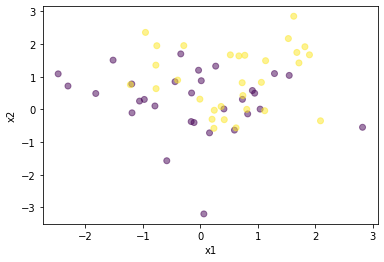

In [9]:
# note how the two categories are plotted
# together in one go by providing the 
# label array as color argument (c=sgy)

plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

### Import Keras

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation , Input , Flatten
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

### Create a model that overfits

In [18]:
# Create a Sequential MLP model with these Dense layers:
# 3 hidden layers with 50 units each and 'relu' activation
# 1 unit output with 'softmax' activation


########################
## PUT YOUR CODE HERE ##
########################
model = Sequential()
model.add(Input(shape=(2)))
model.add(Flatten())

# Hidden Layer
# Write your code here
model.add(Dense(units=50))
model.add(Activation('relu'))

model.add(Dense(units=50))
model.add(Activation('relu'))

model.add(Dense(units=50))
model.add(Activation('relu'))

# Output Layer
# Write your code here
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [19]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.33)

In [24]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
########################

adam_optimizer = Adam(learning_rate=0.01 ,beta_1=0.9,beta_2=0.999,name="Adam")
model.compile(
    optimizer = adam_optimizer, 
    loss = BinaryCrossentropy(from_logits=True),
    metrics = 'accuracy'
)

In [25]:
# Start training and fit your model with desired parameters and validation_split=0.2

########################
## PUT YOUR CODE HERE ##
########################
# Write your code herea
history = model.fit(
   x_train, 
   y_train, 
   batch_size = 64, 
   epochs = 500,
   verbose="auto",
   validation_data = (x_test, y_test)
  #  validation_split = 0.2
)

Epoch 1/500
1/1 [==============================] - 1s 683ms/step - loss: 0.0287 - accuracy: 0.9750 - val_loss: 3.2183 - val_accuracy: 0.6500
Epoch 2/500
1/1 [==============================] - 0s 34ms/step - loss: 0.4592 - accuracy: 0.9250 - val_loss: 2.0917 - val_accuracy: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 29ms/step - loss: 0.1338 - accuracy: 0.9750 - val_loss: 1.7882 - val_accuracy: 0.8000
Epoch 4/500
1/1 [==============================] - 0s 28ms/step - loss: 0.1899 - accuracy: 0.9250 - val_loss: 2.1028 - val_accuracy: 0.8000
Epoch 5/500
1/1 [==============================] - 0s 29ms/step - loss: 0.1849 - accuracy: 0.9500 - val_loss: 2.7139 - val_accuracy: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0611 - accuracy: 0.9750 - val_loss: 3.1657 - val_accuracy: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 37ms/step - loss: 0.1387 - accuracy: 0.9500 - val_loss: 3.1625 - val_accuracy: 0.7500
Epoch 8/500
1/1 [==

### Plot Your Results

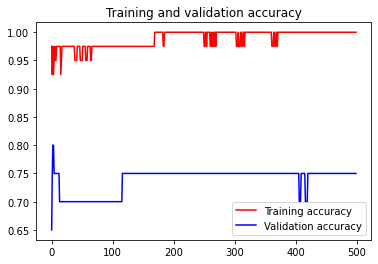

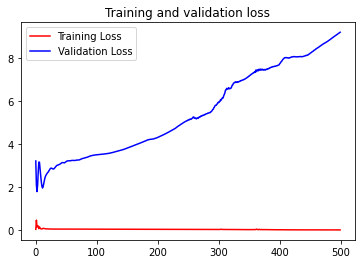

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate your model

In [ ]:
# Evaluate your model with train and test data


########################
## PUT YOUR CODE HERE ##
########################

# Now you need to use your knowledge and methods (Regularization, Dropout, etc) to prevent overfitting and then evaluate and compare your results

In [1]:
from keras.layers import Dropout
from keras import regularizers

In [22]:
# model with dropout and regularization
regularizer = regularizers.L2(1e-2)

model = Sequential()
model.add(Input(shape=(2)))
model.add(Flatten())

# Hidden Layer
# Write your code here
model.add(Dense(units=50,kernel_regularizer=regularizer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,kernel_regularizer=regularizer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,kernel_regularizer=regularizer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
# Write your code here
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [23]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.33)

In [24]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
########################

adam_optimizer = Adam(learning_rate=0.01 ,beta_1=0.9,beta_2=0.999,name="Adam")
model.compile(
    optimizer = adam_optimizer, 
    loss = BinaryCrossentropy(from_logits=True),
    metrics = 'accuracy'
)

In [25]:
# Start training and fit your model with desired parameters and validation_split=0.2

########################
## PUT YOUR CODE HERE ##
########################
# Write your code herea
history = model.fit(
   x_train, 
   y_train, 
   batch_size = 64, 
   epochs = 500,
   verbose="auto",
   validation_data = (x_test, y_test)
  #  validation_split = 0.2
)

Epoch 1/500
1/1 [==============================] - 1s 950ms/step - loss: 1.7325 - accuracy: 0.4500 - val_loss: 1.6325 - val_accuracy: 0.5500
Epoch 2/500
1/1 [==============================] - 0s 34ms/step - loss: 1.6367 - accuracy: 0.4750 - val_loss: 1.5508 - val_accuracy: 0.6500
Epoch 3/500
1/1 [==============================] - 0s 40ms/step - loss: 1.5294 - accuracy: 0.5500 - val_loss: 1.4738 - val_accuracy: 0.6500
Epoch 4/500
1/1 [==============================] - 0s 35ms/step - loss: 1.4357 - accuracy: 0.6500 - val_loss: 1.4044 - val_accuracy: 0.7000
Epoch 5/500
1/1 [==============================] - 0s 55ms/step - loss: 1.4830 - accuracy: 0.4500 - val_loss: 1.3444 - val_accuracy: 0.6500
Epoch 6/500
1/1 [==============================] - 0s 39ms/step - loss: 1.3269 - accuracy: 0.5500 - val_loss: 1.2888 - val_accuracy: 0.7000
Epoch 7/500
1/1 [==============================] - 0s 32ms/step - loss: 1.2655 - accuracy: 0.7000 - val_loss: 1.2391 - val_accuracy: 0.7000
Epoch 8/500
1/1 [==

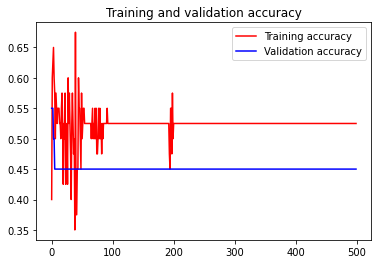

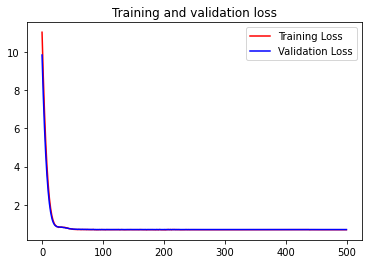

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()